<font size=6><b>Lec00. LSTM

* Examples of LSTM models in Python:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/ 
* Useful tutorial for timeseries forecasting: 
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* Open source “Gluon-TS”. You can use DeepAR model for forecasting if you want an LSTM solution: 
https://github.com/awslabs/gluon-ts 
* Book that explains forecasting principles:
https://otexts.com/fpp2/ 

<pre>
Univariate LSTM Models
        Data set
        Vanilla LSTM
        Stacked LSTM
        Bidirectional LSTM
        CNN LSTM
        ConvLSTM
Multivariate LSTM Models
        Multiple Input Series.
        Multiple Parallel Series.
Multi-Step LSTM Models
        Data Preparation
        Vector Output Model
        Encoder-Decoder Model
Multivariate Multi-Step LSTM Models
        Multiple Input Multi-Step Output.
        Multiple Parallel Input and Multi-Step Output.

In [1]:
from numpy import array
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
    
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
compare_list = [] 
# compare_df = pd.DataFrame(compare_list, columns=["model_type","model","dim", "X","y", "mse"])
# compare_df.head()

In [4]:
EPOCHS__   = 300
PATIENCE__ = 15

# Univariate LSTM Models

## Data set

<pre>
[10, 20, 30, 40, 50, 60, 70, 80, 90]

X,			y
10, 20, 30		40
20, 30, 40		50
30, 40, 50		60
...
60, 70, 80		90

In [5]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
n_steps = 3

X, y = split_sequence(raw_seq, n_steps)

print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")
    
# reshape : [samples, timesteps] --> [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape, y.shape)

(6, 3) (6,)
[10 20 30] 40
------------------
[20 30 40] 50
------------------
[30 40 50] 60
------------------
[40 50 60] 70
------------------
[50 60 70] 80
------------------
[60 70 80] 90
------------------
(6, 3, 1) (6,)


<img src="https://wikidocs.net/images/page/22886/rnn_image6between7.PNG">

## Vanilla LSTM 
* <font color=red><b>[samples, timesteps, features]

In [6]:
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")
    
x_input = array([70, 80, 90]).reshape((1, n_steps, n_features))  #[samples, timesteps, features]
print(x_input)
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[100]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

(6, 3, 1) (6,)
[[10]
 [20]
 [30]] 40
------------------
[[20]
 [30]
 [40]] 50
------------------
[[30]
 [40]
 [50]] 60
------------------
[[40]
 [50]
 [60]] 70
------------------
[[50]
 [60]
 [70]] 80
------------------
[[60]
 [70]
 [80]] 90
------------------
[[[70]
  [80]
  [90]]]
[[101.01401]]
MSE : : 1.0282


In [7]:
dim_str = '[samples, timesteps, features]'
compare_list.append(['Univariate LSTM Models', 'Vanilla LSTM',dim_str,x_input, yhat, mse])  

## Stacked LSTM 
* [samples, timesteps, features]

In [8]:
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])

print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")
    
x_input = array([70, 80, 90]).reshape((1, n_steps, n_features))  #[samples, timesteps, features]
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[100]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

(6, 3, 1) (6,)
[[10]
 [20]
 [30]] 40
------------------
[[20]
 [30]
 [40]] 50
------------------
[[30]
 [40]
 [50]] 60
------------------
[[40]
 [50]
 [60]] 70
------------------
[[50]
 [60]
 [70]] 80
------------------
[[60]
 [70]
 [80]] 90
------------------
[[103.255325]]
MSE : : 10.5971


In [9]:
dim_str = '[samples, timesteps, features]'
compare_list.append(['Univariate LSTM Models', 'Stacked LSTM',dim_str,x_input, yhat, mse])  

## ★Bidirectional LSTM 
* [samples, timesteps, features]


In [10]:
from keras.layers import Bidirectional

In [11]:
#-------------------------------------------------------------
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")
    
x_input = array([70, 80, 90]).reshape((1, n_steps, n_features))  #[samples, timesteps, features]
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[100]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

(6, 3, 1) (6,)
[[10]
 [20]
 [30]] 40
------------------
[[20]
 [30]
 [40]] 50
------------------
[[30]
 [40]
 [50]] 60
------------------
[[40]
 [50]
 [60]] 70
------------------
[[50]
 [60]
 [70]] 80
------------------
[[60]
 [70]
 [80]] 90
------------------
[[100.12335]]
MSE : : 0.0152


In [12]:
dim_str = '[samples, timesteps, features]'
compare_list.append(['Univariate LSTM Models', 'Bidirectional LSTM',dim_str,x_input, yhat, mse])  

## ★CNN LSTM 
* <font color=red><b>[samples, subsequences, timesteps, features]

In [13]:
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [14]:
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
n_steps = 4
X, y = split_sequence(raw_seq, n_steps)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")
print(X.shape, y.shape)

[10 20 30 40] 50
------------------
[20 30 40 50] 60
------------------
[30 40 50 60] 70
------------------
[40 50 60 70] 80
------------------
[50 60 70 80] 90
------------------
(5, 4) (5,)


In [15]:
# reshape : [samples, timesteps] -->  [samples, subsequences, timesteps, features]
n_subseq   = 2
n_steps    = 2
n_features = 1
X = X.reshape((X.shape[0], n_subseq, n_steps, n_features))

print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")


(5, 2, 2, 1) (5,)
[[[10]
  [20]]

 [[30]
  [40]]] 50
------------------
[[[20]
  [30]]

 [[40]
  [50]]] 60
------------------
[[[30]
  [40]]

 [[50]
  [60]]] 70
------------------
[[[40]
  [50]]

 [[60]
  [70]]] 80
------------------
[[[50]
  [60]]

 [[70]
  [80]]] 90
------------------


In [16]:
#-------------------------------------------------------------
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])

x_input = array([60, 70, 80, 90]).reshape((1, n_subseq, n_steps, n_features)) #2, 2, 1
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[100]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

[[101.11435]]
MSE : : 1.2418


In [17]:
dim_str = '[samples, subsequences, timesteps, features]'
compare_list.append(['Univariate LSTM Models', 'CNN LSTM',dim_str,x_input, yhat, mse])  

## ConvLSTM 
* <font color=red><b>[samples, timesteps, rows, columns, features]

In [18]:
from keras.layers import ConvLSTM2D

In [19]:
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
n_steps = 4
X, y = split_sequence(raw_seq, n_steps)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")
print(X.shape, y.shape)

[10 20 30 40] 50
------------------
[20 30 40 50] 60
------------------
[30 40 50 60] 70
------------------
[40 50 60 70] 80
------------------
[50 60 70 80] 90
------------------
(5, 4) (5,)


In [20]:
# reshape : [samples, timesteps] --> [samples, timesteps, rows, columns, features]
n_seq      = 2
n_steps    = 2
n_features = 1
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")


(5, 2, 1, 2, 1) (5,)
[[[[10]
   [20]]]


 [[[30]
   [40]]]] 50
------------------
[[[[20]
   [30]]]


 [[[40]
   [50]]]] 60
------------------
[[[[30]
   [40]]]


 [[[50]
   [60]]]] 70
------------------
[[[[40]
   [50]]]


 [[[60]
   [70]]]] 80
------------------
[[[[50]
   [60]]]


 [[[70]
   [80]]]] 90
------------------


In [21]:
#-------------------------------------------------------------
model = Sequential()
# [samples, timesteps, rows, columns, features]
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features))) 
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[100]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

[[104.403595]]
MSE : : 19.3916


In [22]:
dim_str = '[samples, timesteps, rows, columns, features]'
compare_list.append(['Univariate LSTM Models', 'ConvLSTM',dim_str,x_input, yhat, mse])  


# Multivariate LSTM Models
        

## Data set

<pre>
[10, 20, 30, 40, 50, 60, 70, 80, 90]
[15, 25, 35, 45, 55, 65, 75, 85, 95]

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


X,		y
10, 15
20, 25
30, 35		65

20, 25
30, 35
40, 45		85
...
70, 75
80, 85
90, 95		185

## ★MultipleInput Series 

In [23]:
from numpy import array
from numpy import hstack

in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# [rows, columns] 
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [24]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [25]:
n_steps = 3    #timesteps
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
------------------
[[20 25]
 [30 35]
 [40 45]] 85
------------------
[[30 35]
 [40 45]
 [50 55]] 105
------------------
[[40 45]
 [50 55]
 [60 65]] 125
------------------
[[50 55]
 [60 65]
 [70 75]] 145
------------------
[[60 65]
 [70 75]
 [80 85]] 165
------------------
[[70 75]
 [80 85]
 [90 95]] 185
------------------


In [26]:
n_features = X.shape[2]

In [27]:
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


x_input = array([[80, 85], [90, 95], [100, 105]]).reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[205]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

[[205.16708]]
MSE : : 0.0279


In [28]:
dim_str="[rows, columns]"
compare_list.append(['Multivariate LSTM Models','Multiple Input Series',dim_str,x_input, yhat, mse])  

## ★MultipleParallel Series
<pre>
X : 
10, 15, 25
20, 25, 45
30, 35, 65

y :
40, 45, 85

In [29]:
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [30]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [31]:
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
------------------
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
------------------
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
------------------
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
------------------
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
------------------
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]
------------------


In [32]:
n_features = X.shape[2]

#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


x_input = array([[70,75,145], [80,85,165], [90,95,185]]).reshape((1, n_steps, n_features))
print(x_input)
yhat = model.predict(x_input, verbose=0)
print(yhat)
 
test_y = np.array([[100, 105, 205]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

[[[ 70  75 145]
  [ 80  85 165]
  [ 90  95 185]]]
[[100.68982 106.199   204.83968]]
MSE : : 0.6464


In [33]:
dim_str="[rows, columns]"
compare_list.append(['Multivariate LSTM Models','Multiple Parallel Series',dim_str,x_input, yhat, mse])  

# Multi-Step LSTM Models

## Data set

<pre>
[10, 20, 30, 40, 50, 60, 70, 80, 90]

X,			y
10, 20, 30		40 50
20, 30, 40		50 60
30, 40, 50		60 70
...
50, 60, 70		80 90

In [34]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 

raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
n_steps_in, n_steps_out = 3, 2
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

[10 20 30] [40 50]
------------------
[20 30 40] [50 60]
------------------
[30 40 50] [60 70]
------------------
[40 50 60] [70 80]
------------------
[50 60 70] [80 90]
------------------


## Vector Output Model

<pre>
X : [70, 80, 90]
y : [100,110]

In [35]:
# shape : [samples, timesteps] --> [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

(5, 3, 1) (5, 2)
[[10]
 [20]
 [30]] [40 50]
------------------
[[20]
 [30]
 [40]] [50 60]
------------------
[[30]
 [40]
 [50]] [60 70]
------------------
[[40]
 [50]
 [60]] [70 80]
------------------
[[50]
 [60]
 [70]] [80 90]
------------------


In [36]:
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])

x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array([[100, 110]])
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

[[104.01215 116.03949]]
MSE : : 26.2864


In [37]:
dim_str = "[samples, timesteps, features]"
compare_list.append(['Multi-Step LSTM Models','Vector Output',dim_str,x_input, yhat, mse])  

## Encoder-Decoder Model 

In [38]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [39]:
# shape : [samples, timesteps] --> [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))

print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

(5, 3, 1) (5, 2, 1)
[[10]
 [20]
 [30]] [[40]
 [50]]
------------------
[[20]
 [30]
 [40]] [[50]
 [60]]
------------------
[[30]
 [40]
 [50]] [[60]
 [70]]
------------------
[[40]
 [50]
 [60]] [[70]
 [80]]
------------------
[[50]
 [60]
 [70]] [[80]
 [90]]
------------------


In [40]:
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


x_input = array([70, 80, 90]).reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

# -------------- Estimator expected <= 2 dim -------------------
yhat2 = yhat.reshape(-1,1)
test_y = np.array( [[100],[110]]  )
mse = f"{mean_squared_error(test_y, yhat2):.4f}"
print(f"MSE : : {mse}")

[[[101.36606]
  [114.12388]]]
MSE : : 9.4362


In [41]:
dim_str = "[samples, timesteps, features]"
compare_list.append(['Multi-Step LSTM Models','Encoder-Decoder',dim_str,x_input, yhat, mse])  

# Multivariate Multi-Step LSTM Models
        
        

## Data set

<pre>
[10, 20, 30, 40, 50, 60, 70, 80, 90]
[15, 25, 35, 45, 55, 65, 75, 85, 95]

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


X,		y
10, 15
20, 25
30, 35		65, 85

20, 25
30, 35
40, 45		85, 105
...
60, 65
70, 75
80, 85		165, 185

In [42]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [43]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# [rows, columns] 
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
dataset = hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [44]:
n_steps_in, n_steps_out = 3, 2
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

(6, 3, 2) (6, 2)
[[10 15]
 [20 25]
 [30 35]] [65 85]
------------------
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
------------------
[[30 35]
 [40 45]
 [50 55]] [105 125]
------------------
[[40 45]
 [50 55]
 [60 65]] [125 145]
------------------
[[50 55]
 [60 65]
 [70 75]] [145 165]
------------------
[[60 65]
 [70 75]
 [80 85]] [165 185]
------------------


## Multiple Input Multi-Step Output

<pre>
X,		y
10, 15
20, 25
30, 35		65, 85

20, 25
30, 35
40, 45		85, 105
...
60, 65
70, 75
80, 85		165, 185

In [45]:
n_features = X.shape[2]
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


x_input = array([[70, 75], [80, 85], [90, 95]]).reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_y = np.array( [[185,205]]  )
mse = f"{mean_squared_error(test_y, yhat):.4f}"
print(f"MSE : : {mse}")

[[186.0647  206.36623]]
MSE : : 1.5001


In [46]:
dim_str="[rows, columns]"
compare_list.append(['Multivariate Multi-Step LSTM Models','Multiple Input Multi-Step Output',dim_str,x_input, yhat, mse])  

## Multiple Parallel Input and Multi-Step Output 

<pre>
X : 
10, 15, 25
20, 25, 45
30, 35, 65

y : 
40, 45, 85
50, 55, 105

In [47]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [48]:
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [49]:
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
    print("------------------")

(5, 3, 3) (5, 2, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
------------------
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
------------------
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
------------------
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
------------------
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]
------------------


In [50]:
n_features = X.shape[2]
#-------------------------------------------------------------
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
#-------------------------------------------------------------
stop = EarlyStopping(monitor='loss', patience=PATIENCE__)
model.fit(X, y, epochs=EPOCHS__, verbose=0,  callbacks=[stop])


x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]]).reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

# -------------- Estimator expected <= 2 dim -------------------
yhat2 = yhat.reshape(-1,1)
print(yhat2)


test_y = np.array( [[ 90], [95], [185], [100], [105], [205]] )
mse = f"{mean_squared_error(test_y, yhat2):.4f}"
print(f"MSE : : {mse}")

[[[ 90.265816  95.88     185.84712 ]
  [100.86708  105.51342  206.3824  ]]]
[[ 90.265816]
 [ 95.88    ]
 [185.84712 ]
 [100.86708 ]
 [105.51342 ]
 [206.3824  ]]
MSE : : 0.7482


In [51]:
dim_str="[rows, columns]"
compare_list.append(['Multivariate Multi-Step LSTM Models','Multiple Parallel Input and Multi-Step Output',dim_str,x_input, yhat, mse])  


# 비교

In [52]:
compare_df = pd.DataFrame(compare_list, columns=["type","model","dim", "X","y", "mse"])
compare_df = compare_df.set_index("model")
compare_df['mse'] = compare_df['mse'].astype(float)
compare_df = compare_df.sort_values('mse', ascending=True)
compare_df

,type,dim,X,y,mse
model,,,,,
Bidirectional LSTM,Univariate LSTM Models,"[samples, timesteps, features]","[[[70], [80], [90]]]",[[100.12335]],0.0152
Multiple Input Series,Multivariate LSTM Models,"[rows, columns]","[[[80, 85], [90, 95], [100, 105]]]",[[205.16708]],0.0279
Multiple Parallel Series,Multivariate LSTM Models,"[rows, columns]","[[[70, 75, 145], [80, 85, 165], [90, 95, 185]]]","[[100.68982, 106.199, 204.83968]]",0.6464
Multiple Parallel Input and Multi-Step Output,Multivariate Multi-Step LSTM Models,"[rows, columns]","[[[60, 65, 125], [70, 75, 145], [80, 85, 165]]]","[[[90.265816, 95.88, 185.84712], [100.86708, 105.51342, 206.3824]]]",0.7482
Vanilla LSTM,Univariate LSTM Models,"[samples, timesteps, features]","[[[70], [80], [90]]]",[[101.01401]],1.0282
CNN LSTM,Univariate LSTM Models,"[samples, subsequences, timesteps, features]","[[[[60], [70]], [[80], [90]]]]",[[101.11435]],1.2418
Multiple Input Multi-Step Output,Multivariate Multi-Step LSTM Models,"[rows, columns]","[[[70, 75], [80, 85], [90, 95]]]","[[186.0647, 206.36623]]",1.5001
Encoder-Decoder,Multi-Step LSTM Models,"[samples, timesteps, features]","[[[70], [80], [90]]]","[[[101.36606], [114.12388]]]",9.4362
Stacked LSTM,Univariate LSTM Models,"[samples, timesteps, features]","[[[70], [80], [90]]]",[[103.255325]],10.5971


<AxesSubplot:xlabel='model'>

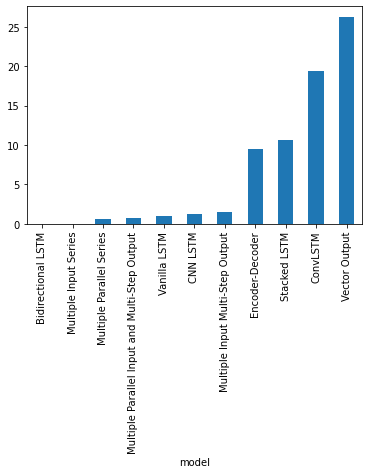

In [53]:
compare_df['mse'].plot.bar()